# **Name : Hardik Parmar**
# **Task-5 : Sales prediction using Python**

In [ ]:
import pandas as pd

import numpy as np

import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Advertising.csv')

In [ ]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

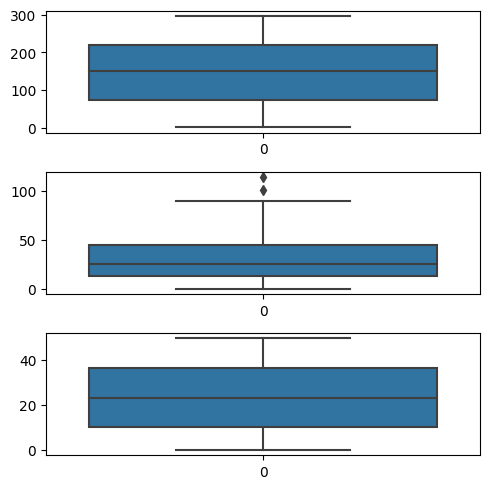

In [ ]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<Axes: xlabel='Newspaper', ylabel='Density'>

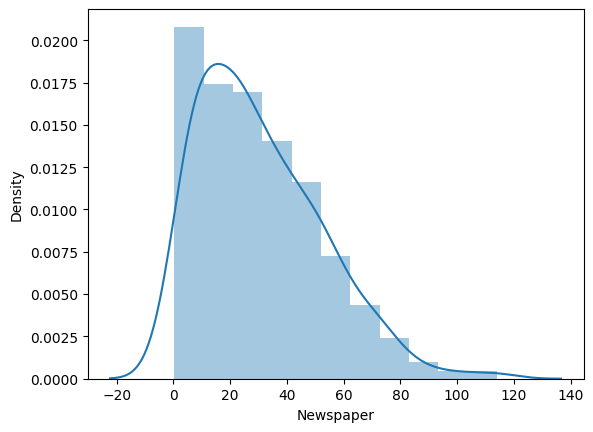

In [ ]:
sns.distplot(df['Newspaper'])

In [ ]:
igr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25) - (igr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (igr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93, 'Newspaper']=93

<Axes: >

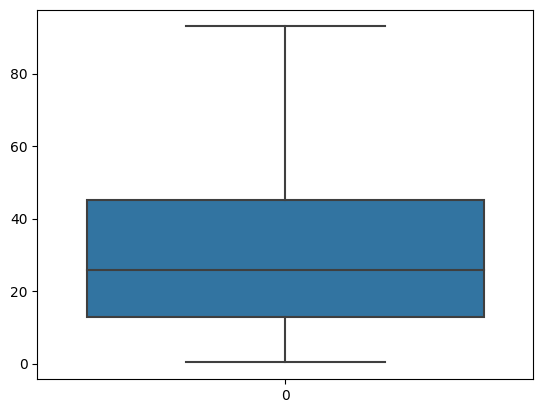

In [ ]:
sns.boxplot(data[ 'Newspaper'])

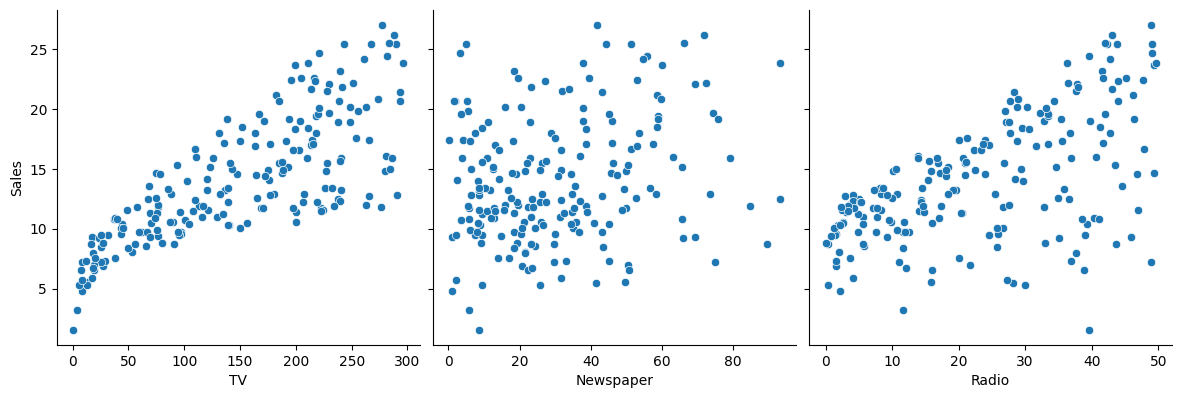

In [ ]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
      y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

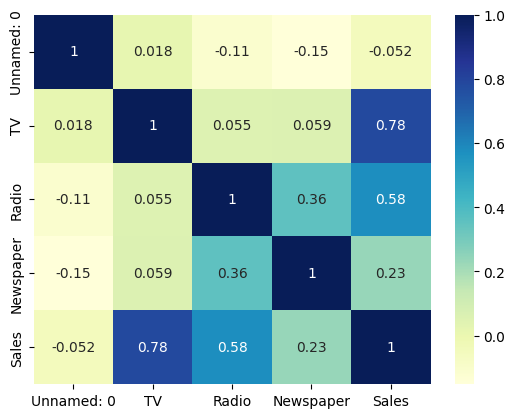

In [ ]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()[ 'Sales' ]>+0.5)|(df.corr()[ 'Sales' ]<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
X = data['TV']
Y = data['Sales']

In [ ]:
X = X.values.reshape(-1,1)

In [ ]:
X

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(X.shape,Y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.33)

In [ ]:
print(X_train.shape,Y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


In [ ]:
knn = KNeighborsRegressor().fit(X_train, Y_train)
knn


KNeighborsRegressor()

In [ ]:
knn_train_pred = knn.predict(X_train)

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE", "Variance"])

In [ ]:
knn_test_pred  = knn.predict(X_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[18.34 13.4  20.58 20.64 19.76 20.58 15.96  7.72 15.6  16.18 19.36 11.1
 19.12 10.18 18.3   7.88  5.96 16.1  14.58  4.94 16.64 11.06 15.9  17.52
 15.9  14.8  17.52 11.8  11.06 15.36 21.06 14.08 18.34 15.18 11.38 17.78
 11.38 17.   15.34 10.5  17.24 16.24  5.96 13.48  7.72  9.88 13.52 16.64
 17.78  5.96 18.34 15.18 17.   11.6  13.4  11.44  9.98 17.24  7.3   9.46
 11.44 11.38 18.92 20.58 13.18 17.24  7.88 17.24 18.38 13.76  7.34 20.64
  7.88 19.12  5.58  5.96 18.72 18.34 19.36  7.38  7.52 11.44 20.7  14.8
 16.64  9.6  10.02 18.92 17.04 18.3   7.3   9.98 15.74 14.26 10.88 15.34
 13.18 19.96 19.76 13.4  17.78 14.26 18.34 13.18 21.34  7.52 15.56 16.64
  7.52 18.3  11.44 11.38  7.72 10.02 18.3  14.16 17.52 11.1  13.2  13.48
 15.96 11.26 11.44 15.38 15.38  5.96 11.44 14.9  11.1  17.52 13.48 15.74
  9.6  11.44] [18.12  9.6  16.1  18.38 17.78 14.08  5.98 14.72 15.38  4.94 11.06 17.24
 11.38 19.68 14.8  18.34  7.88 15.32 10.02 11.38 15.38 13.48 18.12 15.56
 19.68  7.3  11.38 12.74 11.38 17.04 21

In [ ]:
r2 = r2_score(Y_test,knn_test_pred)
r2_train = r2_score(Y_train, knn_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse),

R2: 0.5220307895523801
RMSE: 3.418020869840713


(None,)

In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.649249,0.522031,3.418021,0.127218


In [ ]:
svr = SVR().fit(X_train,Y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(X_train)
svr_test_pred = svr.predict(X_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[17.34554991 12.50027863 17.47203652 16.90317521 17.11405522 17.47233836
 16.43003137  7.28582207 15.36135445 14.33549587 16.82005595 11.60984844
 16.89592379 11.80502004 16.99557504  7.6939988   7.09944228 17.32944355
 13.32491401  7.02595201 16.70096725  9.94971922 17.25692441 17.13706638
 17.28501548 16.46171578 16.30430029 12.21263018  9.83989772 15.74578512
 17.45594627 13.82945483 17.38464595 14.44186312 10.39493708 16.68054436
 10.44631676 16.04245993 15.02808916  9.42243416 17.44327186 14.74257169
  7.07928856 14.01928529  7.28582207  9.03875229 12.54913285 15.31602138
 16.46865725  7.09486646 17.35178261 14.52101399 16.0232997  10.31129309
 12.50027863 10.13066153 11.72855728 17.43004527  7.54719608  8.72265605
 10.02727622 10.50402108 17.08639629 17.47270214 13.08933847 17.42822562
  7.64751048 17.42730202 16.24189642 14.13783347  7.18466749 16.90027886
  7.82309082 16.91782568  7.05685204  7.0861352  16.84131425 17.40449028
 16.82309486  7.30589704  7.35122846 11.38083389 17

In [ ]:
r2 = r2_score(Y_test,svr_test_pred)
r2_train = r2_score(Y_train, svr_train_pred)
rmse = np.sqrt(mean_squared_error(Y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse),

R2: 0.5828492710703753
RMSE: 3.1931642094106265


(None,)

In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.649249,0.522031,3.418021,0.127218
1,Support Vector Machine,0.571178,0.582849,3.193164,-0.011671


In [ ]:
import statsmodels.api as sm

In [ ]:
X_train_constant = sm.add_constant(X_train)

In [ ]:
model = sm.OLS(Y_train, X_train_constant).fit()

In [ ]:
model.params

const    7.028424
x1       0.046699
dtype: float64

In [ ]:
print(model.summary ())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     186.9
Date:                Fri, 07 Apr 2023   Prob (F-statistic):           4.72e-27
Time:                        10:51:39   Log-Likelihood:                -355.17
No. Observations:                 134   AIC:                             714.3
Df Residuals:                     132   BIC:                             720.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0284      0.587     11.981      0.0

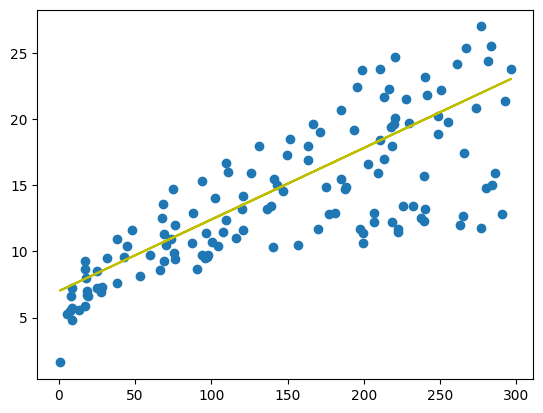

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, 6.9955 + 0.0541 * X_train, 'y')
plt.show()

In [ ]:
y_train_pred = model.predict(X_train_constant)
res = (Y_train - y_train_pred)
res

33    -2.031578
71     0.244067
93     3.454892
84     4.701420
178   -8.149933
         ...   
142    2.774530
67    -0.133542
97    -0.162999
195   -1.212312
18     1.040031
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([19.43157802, 12.15593287, 18.74510829, 16.99857986, 19.94993271,
       18.62836174, 16.31678   ,  7.83164056, 15.02789806, 13.90713115,
       16.86782373, 11.42743438, 20.30484223, 11.58153983, 17.15268531,
        8.36400484,  7.43470228, 17.86717421, 12.89844094,  7.06111332,
       16.69036897, 10.19459079, 17.67570987, 17.41419759, 17.7457578 ,
       16.35880876, 16.15333482, 11.91310004, 10.11520313, 15.47153496,
       18.95525208, 13.38877646, 19.30549174, 14.01920784, 10.51681127,
       20.6037134 , 10.55417017, 15.82644448, 14.65430909,  9.81166209,
       18.31548098, 14.34142833,  7.36932421, 13.58024081,  7.83164056,
        9.5268005 , 12.19796163, 14.97652958, 20.86989554,  7.4206927 ,
       19.41289857, 14.10326536, 15.80309517, 10.45610306, 12.15593287,
       10.32534692, 11.52083162, 18.24076318,  8.19588981,  9.28396768,
       10.25062913, 10.59619893, 17.31613049, 18.64704119, 12.67895742,
       18.23142346,  8.31263636, 18.2267536 , 16.07394717, 13.70

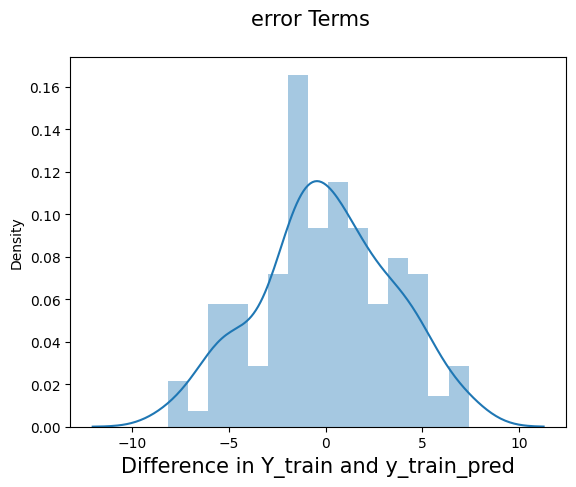

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('error Terms', fontsize = 15)
plt.xlabel( 'Difference in Y_train and y_train_pred', fontsize = 15)
plt.show()

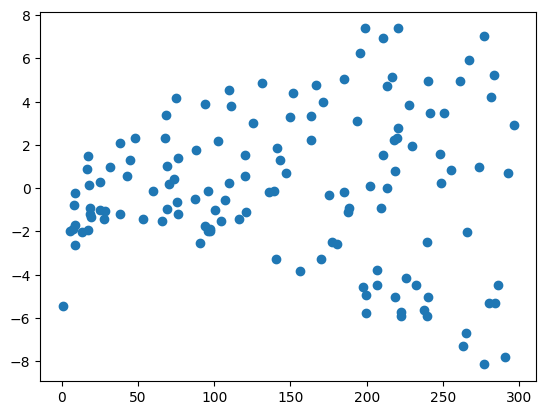

In [ ]:
plt.scatter(X_train, res)
plt.show()

In [ ]:
X_test_constant = sm.add_constant(X_test)
y_pred = model.predict(X_test_constant)

In [ ]:
y_pred

array([20.45894768,  8.87301981, 17.77377697, 15.95253075, 20.73913941,
       13.30004908,  7.57479815, 17.9792509 , 18.11467691,  7.21988863,
       10.15256203, 18.38552891, 10.53549072, 17.08730724, 16.32611972,
       19.29615202,  8.27994732, 15.55559248,  9.04113485, 10.68025644,
       18.1520358 , 13.46816412, 20.55701478, 17.63835097, 17.05461821,
        8.13985146, 10.54483044, 16.55961283, 10.77365369, 14.89247206,
       18.88053429, 16.05059786, 13.54288191, 15.23337199, 17.13400586,
       15.2940802 , 14.02387771,  9.11585264,  7.64017622,  9.65288678,
       20.13672719, 16.25607179, 12.30069859, 12.50150266, 12.77702453,
       14.76171592, 17.48891538,  9.71359499,  7.94371725, 15.0839364 ,
        8.7516034 , 17.68971945, 13.52887232, 15.7984253 , 10.59619893,
       13.17863267,  9.36335533,  8.22390898, 14.71034744, 16.60164159,
       13.34207784, 13.07122584, 11.0304961 , 18.24076318, 11.21729058,
        9.93774837])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(Y_test,y_pred))

2.842939505865826

In [ ]:
r2 = r2_score(Y_test,y_pred)
r2

0.669336895992664

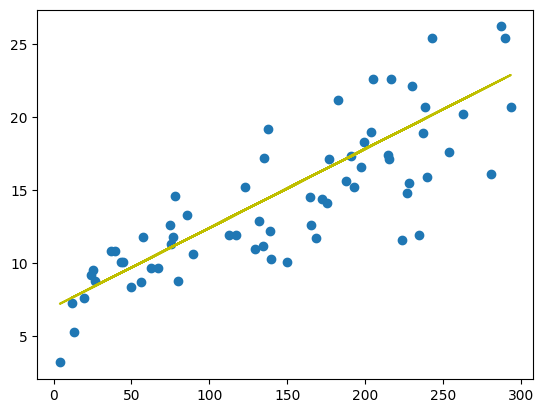

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.9955 + 0.0541 * X_test, 'y')
plt.show()